In [1]:
import pandas as pd
import geopandas as gpd

In [27]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
hex1=gpd.read_file("people_and_order_sum.gpkg")

In [8]:
hex1[(hex1['people_now']>0)&(hex1['order_sum_total']>0)][['people_now', 'order_sum_total', 'geometry']].to_file("plots_final/hexagons.gpkg")

In [9]:
hex1=gpd.read_file("plots_final/hexagons.gpkg")

In [13]:
hex1[(hex1['order_sum_total']<1500000)&(hex1['people_now']<10000)]

people_now  order_sum_total  center  \
0            5.0         18339.77     NaN   
1          239.0           760.00     NaN   
2          869.0         18962.26     NaN   
3         2345.0        444358.46     1.0   
4         1826.0        131146.94     NaN   
...          ...              ...     ...   
4277      2552.0        383190.22     1.0   
4278      2203.0        218239.10     NaN   
4279       350.0         69286.46     NaN   
4280      1296.0        254485.08     NaN   
4281      2006.0        214123.06     NaN   

                                               geometry  
0     POLYGON ((331284.104 6671638.186, 331429.916 6...  
1     POLYGON ((337455.791 6618211.318, 337601.925 6...  
2     POLYGON ((346905.925 6637479.893, 347052.234 6...  
3     POLYGON ((354403.887 6647994.262, 354550.349 6...  
4     POLYGON ((345772.605 6636020.349, 345918.891 6...  
...                                                 ...  
4277  POLYGON ((347276.178 6647707.444, 347422.465 6...  
4278  POLYGON ((355312.475 6647993.580, 355458.960 6...  
4279  POLYGON ((345304.040 6656471.497, 345450.250 6...  
4280  POLYGON ((351703.841 6654425.498, 351850.216 6...  
4281  POLYGON ((344622.332 6637191.223, 344768.586 6...  

[4240 rows x 4 columns]

In [23]:
hex1['center'] = hex1['center'].fillna(0)

In [24]:
hex1

order_sum  Количество проживающих  center  \
0    1121777.48                   853.0     1.0   
1    3611987.78                 12783.0     0.0   
2    1449174.86                 14516.0     1.0   
3      35548.13                    18.0     0.0   
4      54099.44                   249.0     0.0   
..          ...                     ...     ...   
871  2981927.59                 10931.0     0.0   
872   991918.44                 13959.0     0.0   
873     1908.50                     6.0     0.0   
874   360609.22                  2473.0     0.0   
875  1307062.95                  3811.0     0.0   

                                              geometry  
0    POLYGON ((349466.250 6652088.766, 349748.975 6...  
1    POLYGON ((344384.074 6653259.233, 344666.528 6...  
2    POLYGON ((349364.270 6647121.373, 349647.023 6...  
3    POLYGON ((315875.398 6679483.486, 316156.185 6...  
4    POLYGON ((354974.610 6653255.528, 355257.612 6...  
..                                                 ...  
871  POLYGON ((349475.652 6640399.102, 349758.457 6...  
872  POLYGON ((343655.455 6636023.888, 343937.989 6...  
873  POLYGON ((342260.865 6664937.518, 342543.128 6...  
874  POLYGON ((330427.359 6663764.690, 330709.016 6...  
875  POLYGON ((330215.602 6665514.239, 330497.236 6...  

[876 rows x 4 columns]

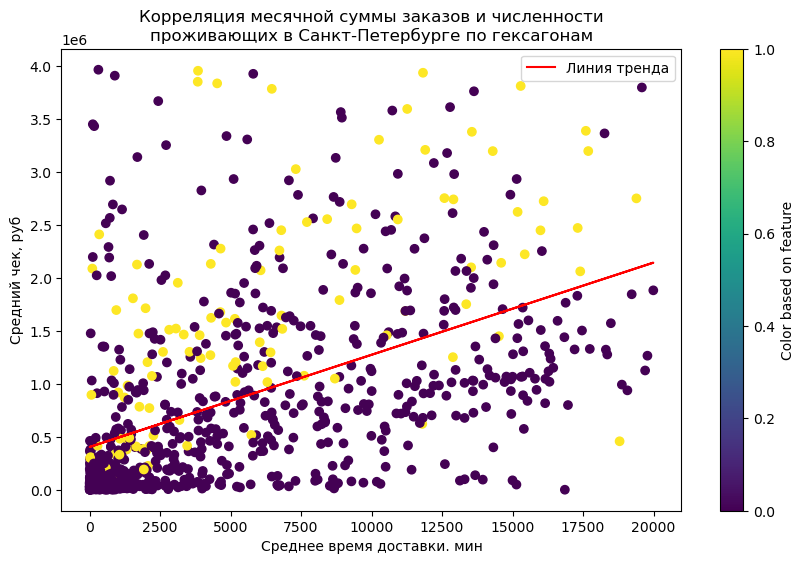

In [26]:
x=hex1[(hex1['order_sum']<4000000)&(hex1['Количество проживающих']<20000)]['Количество проживающих']
y=hex1[(hex1['order_sum']<4000000)&(hex1['Количество проживающих']<20000)]['order_sum']
color=hex1[(hex1['order_sum']<4000000)&(hex1['Количество проживающих']<20000)]['center']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=color, cmap='viridis')
z = np.polyfit (x, y, 1)
p = np.poly1d (z)
plt.plot(x, p(x), color='red', label='Линия тренда')

# Добавление подписей
plt.colorbar(label='Color based on feature')
plt.xlabel('Среднее время доставки. мин')
plt.ylabel('Средний чек, руб')
plt.title('Корреляция месячной суммы заказов и численности\nпроживающих в Санкт-Петербурге по гексагонам')

# Отображение легенды
plt.legend()

# Отображение графика
plt.show()

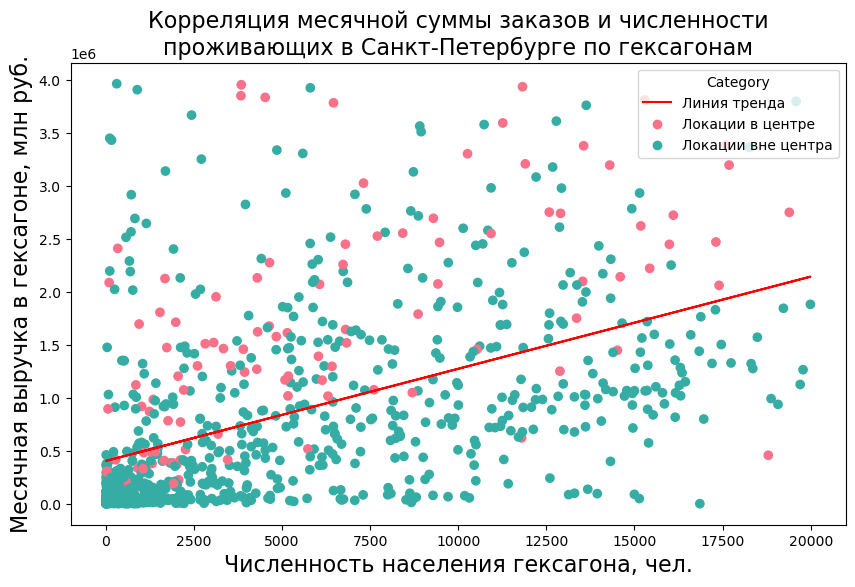

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Пример данных с двумя категориями
data = {'x': hex1[(hex1['order_sum']<4000000)&(hex1['Количество проживающих']<20000)]['Количество проживающих'],
        'y': hex1[(hex1['order_sum']<4000000)&(hex1['Количество проживающих']<20000)]['order_sum'],
        'category': hex1[(hex1['order_sum']<4000000)&(hex1['Количество проживающих']<20000)]['center']}

df = pd.DataFrame(data)

# Задание собственных названий для категорий
custom_labels = {0: 'Локации вне центра', 1: 'Локации в центре'}

# Применение пользовательских названий
df['category_named'] = df['category'].map(custom_labels)

# Создание цветовой палитры для категорий
palette = sns.color_palette('husl', n_colors=2)

# Маппинг категорий на цвета
category_to_color = dict(zip(df['category_named'].unique(), palette))

# Присвоение цветов точкам
colors = df['category_named'].map(category_to_color)

# Построение scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], c=colors)
z = np.polyfit (x, y, 1)
p = np.poly1d (z)
plt.plot(x, p(x), color='red', label='Линия тренда')

plt.xlabel('Численность населения гексагона, чел.', fontsize=16)
plt.ylabel('Месячная выручка в гексагоне, млн руб.', fontsize=16)
plt.title('Корреляция месячной суммы заказов и численности\nпроживающих в Санкт-Петербурге по гексагонам', fontsize=16)

# Добавление легенды с пользовательскими названиями категорий
for category, color in category_to_color.items():
    plt.scatter([], [], c=[color], label=category)
plt.legend(title='Category')

plt.show()


In [43]:
stat_by_year=pd.read_excel("stat_by_year.xlsx")

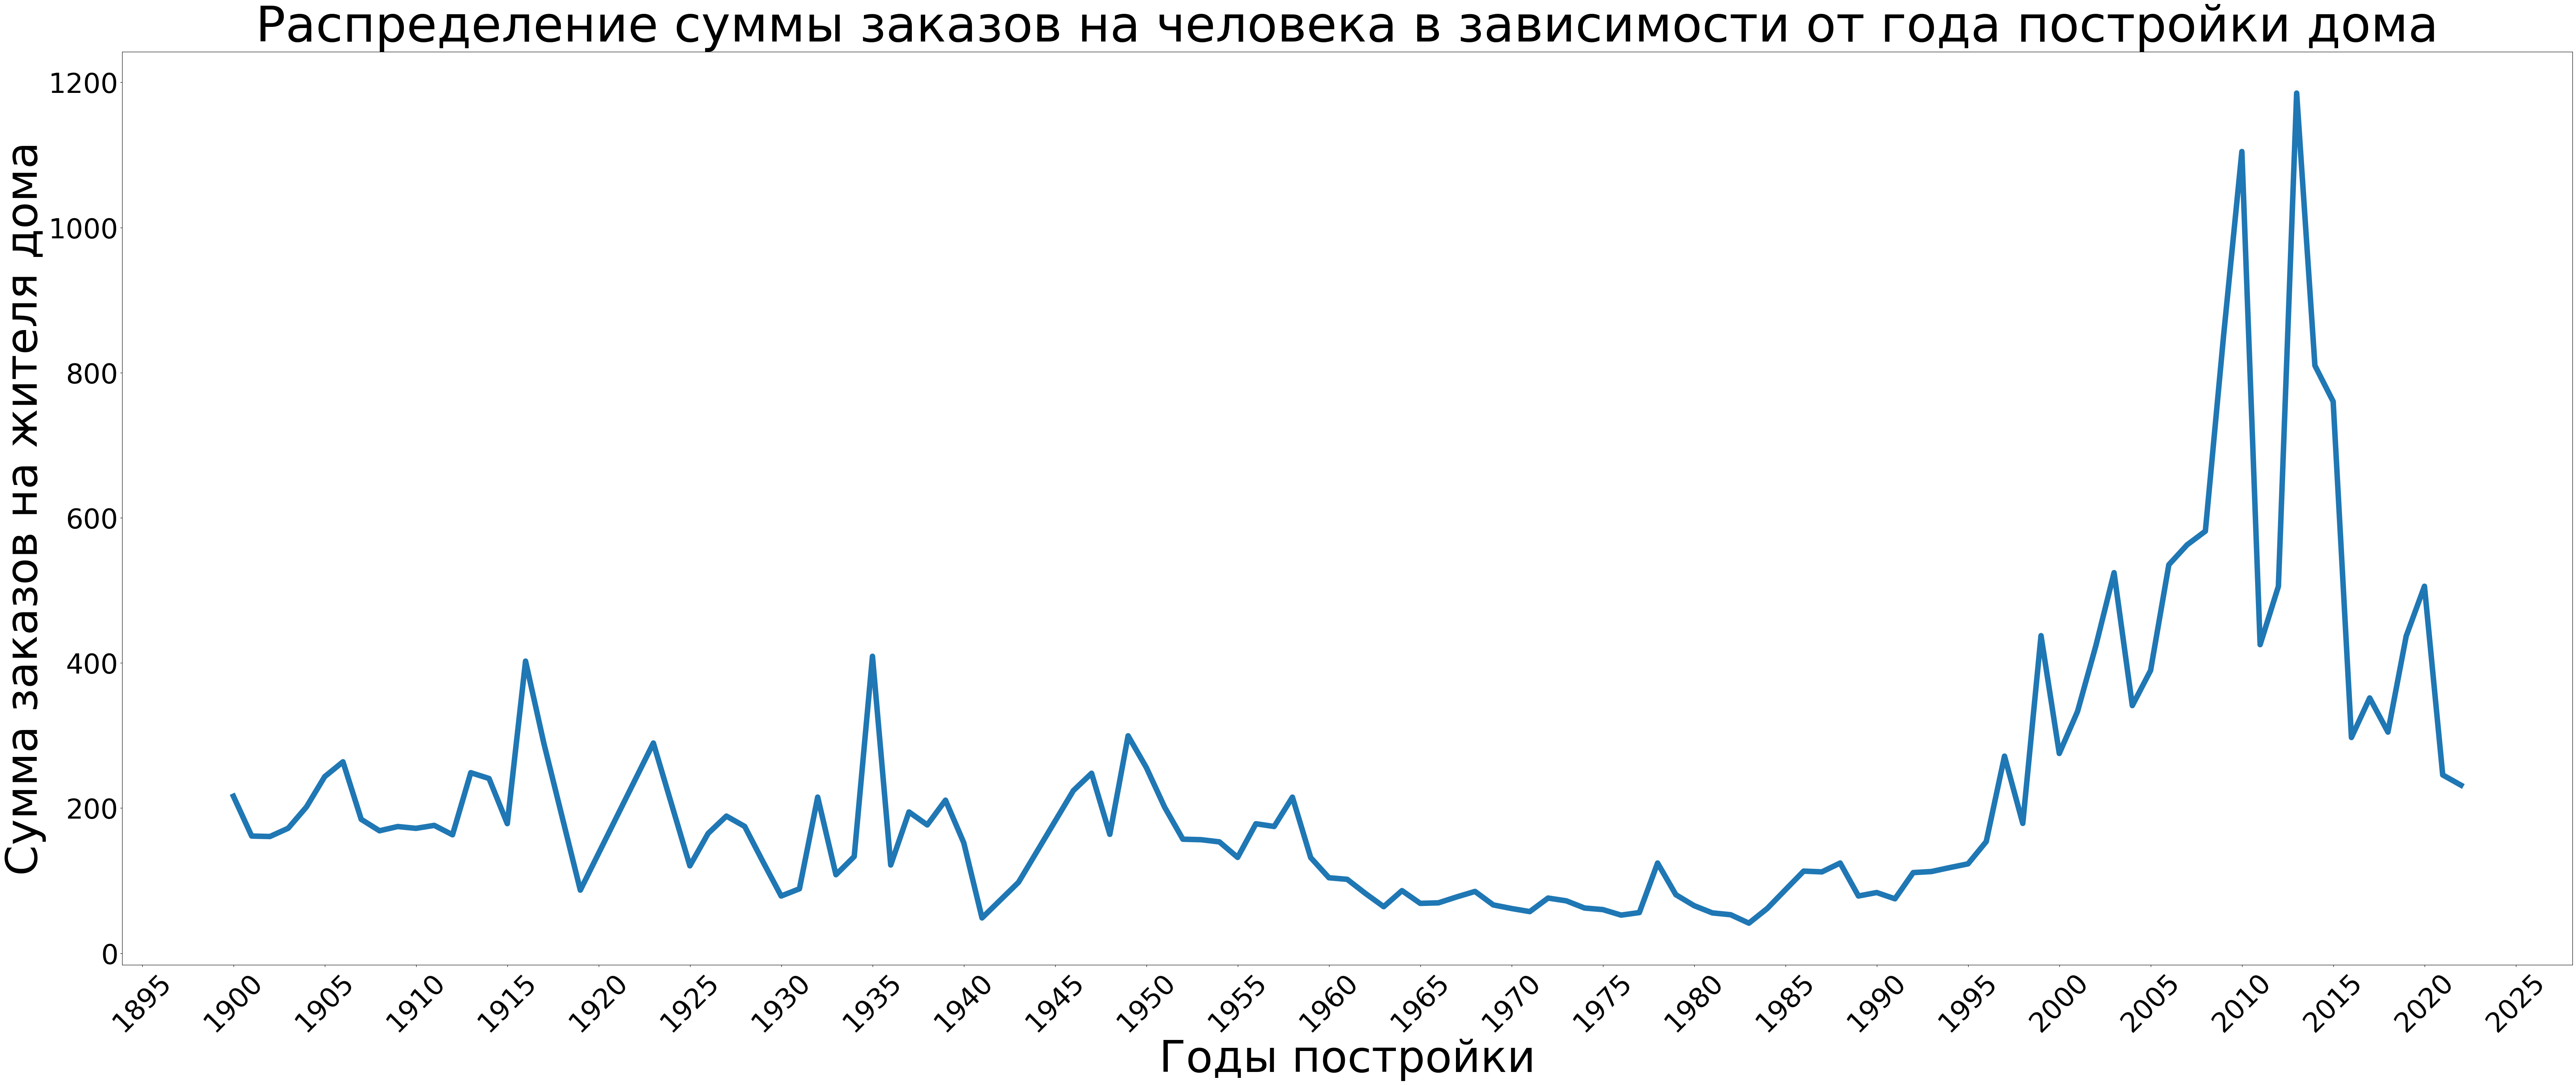

In [48]:
import matplotlib.ticker as ticker
plt.figure(figsize=(80, 30))

plt.plot(stat_by_year[(stat_by_year['year']>=1900)&(stat_by_year['year']<2023)]['year'], stat_by_year[(stat_by_year['year']>=1900)&(stat_by_year['year']<2023)]['rubles_per_person'], linewidth=10)
# stat_by_year['rubles_per_person'].plot(kind='line', linewidth=5)

# Добавление заголовков и подписей осей
plt.title('Распределение суммы заказов на человека в зависимости от года постройки дома', fontsize=90)
plt.xlabel('Годы постройки', fontsize=80)
plt.ylabel('Сумма заказов на жителя дома', fontsize=80)

# Вращение меток оси X
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))  # Устанавливаем частоту меток через каждый год
plt.xticks(rotation=45, fontsize=50)
plt.yticks(rotation=0, fontsize=50)


# Добавление вертикальной линии на 2019 год и подписи
# plt.axvline(x=2019, color='red', linewidth=3, linestyle='--')  # Вертикальная линия
# plt.text(2019, order_sum_per_person_by_year['rub_per_person'].max(), '2019', color='red', fontsize=50, ha='center', va='bottom')

plt.show()
